In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# matplotlib 한글 폰트 오류 문제 해결
font_path = "C:\Windows\Fonts\H2HDRM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')   # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임 변환
file_path = "../day03/남북한발전전력량.xlsx"
df = pd.read_excel(file_path, header=0)
df = df.fillna(method='ffill')

df = df.loc[5:9]
df = df.drop(['전력량 (억㎾h)'], axis=1)
df.set_index('발전 전력별', inplace=True)
df = df.T
df = df.rename(columns={'합계': '총발전량'})
df['전년도발전량']=df['총발전량'].shift(1)

In [5]:
df

발전 전력별,총발전량,수력,화력,원자력,전년도발전량
1990,277,156,121,-,NaN
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221
1995,230,142,88,-,231
1996,213,125,88,-,230
1997,193,107,86,-,213
1998,170,102,68,-,193
1999,186,103,83,-,170


In [6]:
df['증감률']=((df['총발전량']/df['전년도발전량'])-1)*100
df

발전 전력별,총발전량,수력,화력,원자력,전년도발전량,증감율
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.05415
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.5263
1994,231,138,93,-,221,4.52489
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.3913
1997,193,107,86,-,213,-9.38967
1998,170,102,68,-,193,-11.9171
1999,186,103,83,-,170,9.41176


## 두가지 축을 가지는 그래프 그리기

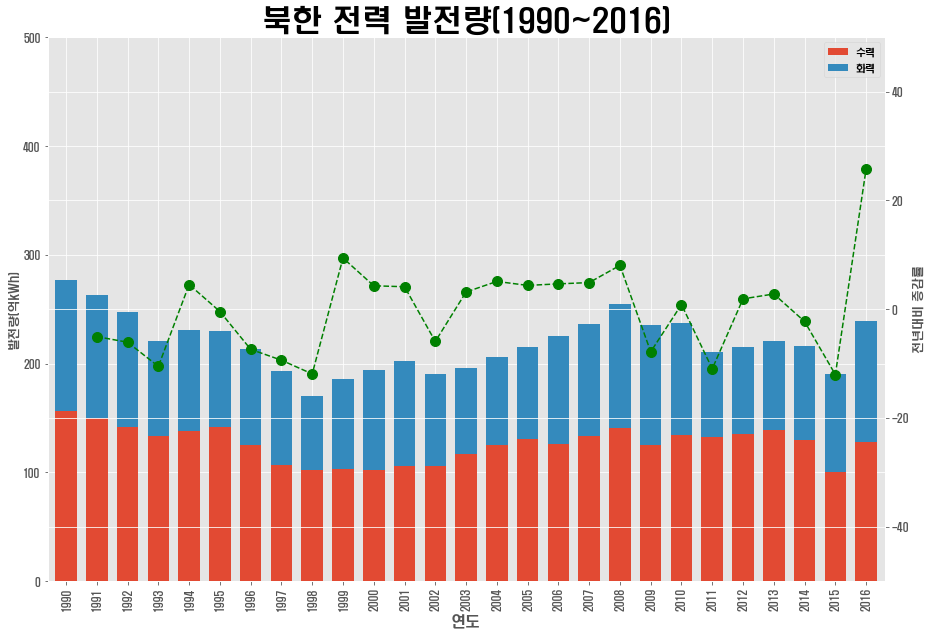

In [15]:
ax1=df[['수력','화력']].plot(kind='bar', figsize=(15,10), width=0.7, stacked=True)

#ax1의 x축을 공유하는 새로운 축을 만듦
ax2=ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=10,
         color='green', label='전년대비 증감율(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도',size=15)
ax1.set_ylabel('발전량(억kWh)')
ax2.set_ylabel('전년대비 증감률')

plt.title('북한 전력 발전량(1990~2016)', size=30)
ax1.legend(loc='best')
plt.show()